In [3]:
%run compile-clean.ipynb

In [4]:
#Identify Heroes picked in each unique game 
hero_picks = hero_class_df.drop_duplicates(subset=['match_id', 'hero'], keep='first')
hero_picks

,match_id,stage,player,team,stat_name,hero,stat_amount,role
12,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,Zenyatta,14845.1934,Support
38,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,McCree,1439.9678,Damage
50,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,Zarya,18040.3536,Tank
78,21211,Overwatch League Stage 1,Fury,London Spitfire,All Damage Done,D.Va,13316.4290,Tank
91,21211,Overwatch League Stage 1,Fury,London Spitfire,Average Time Alive,Wrecking Ball,6.0960,Tank
...,...,...,...,...,...,...,...,...
513912,30157,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,All Damage Done,Ana,3856.8818,Support
513923,30157,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,All Damage Done,Baptiste,4603.0941,Support
513977,30157,Overwatch League 2019 Post-Season,moth,San Francisco Shock,Average Time Alive,Mercy,73.8903,Support
514037,30157,Overwatch League 2019 Post-Season,Haksal,Vancouver Titans,Average Time Alive,Genji,2.5960,Damage


In [13]:
#Count the number of matches
match_count = len(hero_class_df["match_id"].unique())

In [14]:
#Count the number of matches each hero was played and use this to calculate Pick Rate
hero_df = pd.DataFrame(hero_picks['hero'].value_counts())
hero_df = hero_df.rename(columns={"hero" : "Games Used"})
hero_df = hero_df.reset_index()
hero_df = hero_df.rename(columns={"index" : "hero"})
hero_df["Pick Rate"] = hero_df["Games Used"]/match_count*100

In [11]:
#Add a column containing hero roles
hero_pickrate = hero_role.merge(hero_df, how="outer", on="hero")
hero_pickrate = hero_pickrate.sort_values(by=['role', 'Pick Rate'], ascending=False)
hero_pickrate

,hero,role,Games Used,Pick Rate
4,Wrecking Ball,Tank,319,100.000000
3,D.Va,Tank,312,97.805643
7,Winston,Tank,289,90.595611
6,Reinhardt,Tank,288,90.282132
5,Orisa,Tank,257,80.564263
2,Zarya,Tank,252,78.996865
27,Roadhog,Tank,227,71.159875
30,Sigma,Tank,18,5.642633
8,Lúcio,Support,319,100.000000
11,Ana,Support,307,96.238245


In [17]:
#Create bar graph of hero pick rates
support_df = hero_pickrate.loc[(hero_pickrate["role"] == "Support")]
offense_df = hero_pickrate.loc[(hero_pickrate["role"] == "Damage")]
tank_df = hero_pickrate.loc[(hero_pickrate["role"] == "Tank")]

labelss = [
    (support_df.iloc[0,0]),
    (support_df.iloc[1,0]),
    (support_df.iloc[2,0]),
    (offense_df.iloc[0,0]),
    (offense_df.iloc[1,0]),
    (offense_df.iloc[2,0]),
    (tank_df.iloc[0,0]),
    (tank_df.iloc[1,0]),
    (tank_df.iloc[2,0]),   
]

pickrates = [
    (support_df.iloc[0,3]),
    (support_df.iloc[1,3]),
    (support_df.iloc[2,3]),
    (offense_df.iloc[0,3]),
    (offense_df.iloc[1,3]),
    (offense_df.iloc[2,3]),
    (tank_df.iloc[0,3]),
    (tank_df.iloc[1,3]),
    (tank_df.iloc[2,3]),   
]

colors_pickrates = ['#ffd254','#ffb31f','#ff9102',
                    '#14dc71','#1bbd66','#17a258',
                   '#27dbf5','#13b8e8','#0989c2']

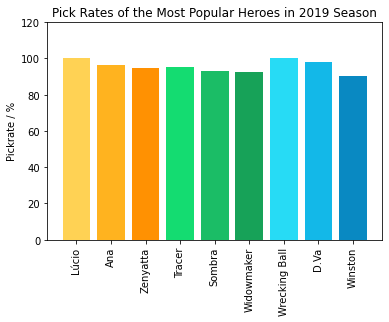

In [18]:
x_axis = np.arange(len(labelss))
plt.xticks(x_axis, labelss, rotation=90)

plt.bar(x_axis, pickrates, align='center', color=colors_pickrates)
plt.title('Pick Rates of the Most Popular Heroes in 2019 Season')
plt.ylabel('Pickrate / %')
plt.ylim(0,(max(pickrates))+(max(pickrates)*0.2))

plt.show()

In [19]:
nationality_count = pd.DataFrame(df['nationality'].value_counts())
nationality_count = nationality_count.sort_values(by='nationality', ascending=False)
# turn index into a column
nationality_count.reset_index(level=0, inplace=True)
#print(nationality_count)

df2 = nationality_count[:5].copy()

# Combine the nationalities below 3% into a new row
new_row = pd.DataFrame(data = {
    'index' : ['Others'],
    'nationality' : [nationality_count['nationality'][5:].sum()]
})

# Drop index to concat
new_row.reset_index()
df2.reset_index()
#print(f'{new_row}\n{df2}')

lower_nat = nationality_count.loc[nationality_count['nationality'] <= 4]
lower_row = lower_nat['nationality'].sum() 
lower_row

nationality_count = pd.concat([df2, new_row])
nationality_count = nationality_count.set_index('index')
nationality_count


,nationality
index,
KR,87
US,16
CN,14
GB,5
FR,5
Others,17


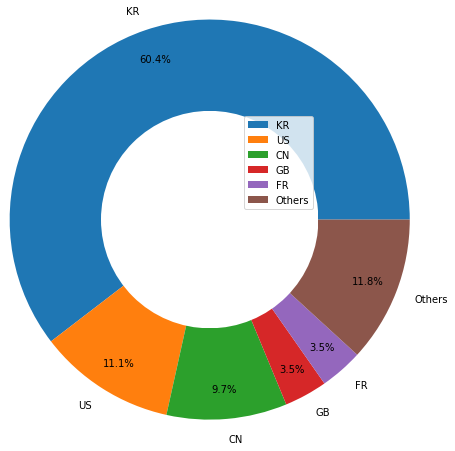

In [16]:
#Create pie chart of Player Nationality
labels = nationality_count.index.tolist()
sizes = nationality_count['nationality']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.85, radius=2.3)

#draw circle
centre_circle = plt.Circle((0,0),1.25,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#plt.tight_layout()
plt.legend()

plt.show()

In [20]:
# Uses locator function to locates the stat_name column, specifically "All Damage Done"
all_damage_df = hero_class_df.loc[(hero_class_df["stat_name"] == "All Damage Done")]

# groups the above stats into an average and groups the average by team name
all_damage_df2 = all_damage_df.groupby(["team"]).mean()["stat_amount"]
all_damage_df2

team
Atlanta Reign             8844.224549
Boston Uprising           7378.813843
Chengdu Hunters           5817.772315
Dallas Fuel               7904.626737
Florida Mayhem            6842.984182
Guangzhou Charge          7285.341954
Hangzhou Spark            9477.816830
Houston Outlaws           6395.184262
London Spitfire           8087.514092
Los Angeles Gladiators    8842.679875
Los Angeles Valiant       8424.741475
New York Excelsior        8257.979682
Paris Eternal             7320.960517
Philadelphia Fusion       8240.809411
San Francisco Shock       9878.222191
Seoul Dynasty             9278.166425
Shanghai Dragons          7542.143569
Toronto Defiant           7127.093354
Vancouver Titans          9566.297400
Washington Justice        7762.859584
Name: stat_amount, dtype: float64

In [21]:
# Uses locator function to locates the stat_name column, specifically "Healing Done"
all_healing_df = hero_class_df.loc[(hero_class_df["stat_name"] == "Healing Done")]

# groups the above stats into an average and groups the average by team name
all_healing_df2 = all_healing_df.groupby(["team"]).mean()["stat_amount"]
all_healing_df2

team
Atlanta Reign             7441.703646
Boston Uprising           6556.930012
Chengdu Hunters           5162.377784
Dallas Fuel               6880.367184
Florida Mayhem            6003.472752
Guangzhou Charge          5846.317261
Hangzhou Spark            7549.955739
Houston Outlaws           5491.716997
London Spitfire           6755.177212
Los Angeles Gladiators    7825.342616
Los Angeles Valiant       7276.205055
New York Excelsior        7225.396520
Paris Eternal             6453.831449
Philadelphia Fusion       7315.038541
San Francisco Shock       8108.924769
Seoul Dynasty             7838.824716
Shanghai Dragons          6230.866473
Toronto Defiant           6606.959693
Vancouver Titans          7865.873309
Washington Justice        6767.672919
Name: stat_amount, dtype: float64

In [22]:
# USes locator function to locates the stat_name column, specifically "Ultimates Earned - Fractional""
all_ult_df = hero_class_df.loc[(hero_class_df["stat_name"] == "Ultimates Earned - Fractional")].reset_index(drop=True)

# groups the above stats into an average and groups the average by team name
all_ult_df2 = all_ult_df.groupby(["team"]).mean()["stat_amount"]
all_ult_df2

team
Atlanta Reign             3.476801
Boston Uprising           3.205015
Chengdu Hunters           2.943363
Dallas Fuel               3.430046
Florida Mayhem            2.988001
Guangzhou Charge          2.857798
Hangzhou Spark            3.677009
Houston Outlaws           2.981220
London Spitfire           3.168636
Los Angeles Gladiators    3.518754
Los Angeles Valiant       3.673656
New York Excelsior        3.330880
Paris Eternal             3.273948
Philadelphia Fusion       3.360197
San Francisco Shock       4.016565
Seoul Dynasty             3.430053
Shanghai Dragons          3.176375
Toronto Defiant           3.096348
Vancouver Titans          3.703520
Washington Justice        3.451257
Name: stat_amount, dtype: float64

In [23]:
# Creates a dataframe to showcase the above averages
stat_average_df = pd.DataFrame({"Ult Charge" : all_ult_df2,
                                "Average Healing" : all_healing_df2,
                                "Average Damage" : all_damage_df2
                               })
# Displays the dataframe and sorts the values based on the highest stats 
stat_average_df.sort_values(by=["Ult Charge", "Average Healing", "Average Damage"], ascending=False)
stat_average_df

,Ult Charge,Average Healing,Average Damage
team,,,
Atlanta Reign,3.476801,7441.703646,8844.224549
Boston Uprising,3.205015,6556.930012,7378.813843
Chengdu Hunters,2.943363,5162.377784,5817.772315
Dallas Fuel,3.430046,6880.367184,7904.626737
Florida Mayhem,2.988001,6003.472752,6842.984182
Guangzhou Charge,2.857798,5846.317261,7285.341954
Hangzhou Spark,3.677009,7549.955739,9477.816830
Houston Outlaws,2.981220,5491.716997,6395.184262
London Spitfire,3.168636,6755.177212,8087.514092
